In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv(r'IPT.csv', index_col=0)

In [4]:
df.drop(['Código Município IBGE', 'UF1'], axis=1, inplace=True)

In [5]:
df.head()

,População estimada (2020),26/02/2020,27/02/2020,28/02/2020,29/02/2020,01/03/2020,02/03/2020,03/03/2020,04/03/2020,05/03/2020,...,13/04/2021,14/04/2021,15/04/2021,16/04/2021,17/04/2021,18/04/2021,19/04/2021,20/04/2021,21/04/2021,22/04/2021
Município,,,,,,,,,,,,,,,,,,,,,
AMERICANA,242018,36%,34%,34%,35%,37%,34%,33%,33%,33%,...,40%,38%,38%,39%,42%,48%,38%,39%,44%,37%
AMPARO,72677,33%,33%,33%,35%,36%,36%,36%,36%,36%,...,36%,37%,39%,39%,40%,46%,37%,40%,45%,36%
ANDRADINA,57202,37%,36%,36%,36%,37%,39%,38%,38%,38%,...,44%,43%,42%,43%,41%,50%,42%,44%,49%,44%
ARAÇATUBA,198129,32%,NaN,NaN,NaN,33%,31%,31%,30%,NaN,...,39%,36%,38%,38%,40%,43%,36%,38%,44%,35%
ARARAQUARA,238339,NaN,NaN,NaN,NaN,33%,NaN,NaN,NaN,NaN,...,39%,37%,37%,36%,40%,47%,37%,37%,44%,37%


In [6]:
datas = np.asarray(df.columns[1:])
datas.shape[0] #Numero de colunas como data

419

In [7]:
def mudaTipo(df, listaDasColunas):
    i=1
    qdadeElementos = listaDasColunas.shape[0]
    for i in range(qdadeElementos):
        df[listaDasColunas[i]] = (df[listaDasColunas[i]].str.rstrip('%').astype('float'))/100.0

In [8]:
mudaTipo(df, datas)

In [9]:
df.head()

,População estimada (2020),26/02/2020,27/02/2020,28/02/2020,29/02/2020,01/03/2020,02/03/2020,03/03/2020,04/03/2020,05/03/2020,...,13/04/2021,14/04/2021,15/04/2021,16/04/2021,17/04/2021,18/04/2021,19/04/2021,20/04/2021,21/04/2021,22/04/2021
Município,,,,,,,,,,,,,,,,,,,,,
AMERICANA,242018,0.36,0.34,0.34,0.35,0.37,0.34,0.33,0.33,0.33,...,0.40,0.38,0.38,0.39,0.42,0.48,0.38,0.39,0.44,0.37
AMPARO,72677,0.33,0.33,0.33,0.35,0.36,0.36,0.36,0.36,0.36,...,0.36,0.37,0.39,0.39,0.40,0.46,0.37,0.40,0.45,0.36
ANDRADINA,57202,0.37,0.36,0.36,0.36,0.37,0.39,0.38,0.38,0.38,...,0.44,0.43,0.42,0.43,0.41,0.50,0.42,0.44,0.49,0.44
ARAÇATUBA,198129,0.32,NaN,NaN,NaN,0.33,0.31,0.31,0.30,NaN,...,0.39,0.36,0.38,0.38,0.40,0.43,0.36,0.38,0.44,0.35
ARARAQUARA,238339,NaN,NaN,NaN,NaN,0.33,NaN,NaN,NaN,NaN,...,0.39,0.37,0.37,0.36,0.40,0.47,0.37,0.37,0.44,0.37


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, AMERICANA to VOTUPORANGA
Columns: 420 entries, População estimada (2020) to 22/04/2021
dtypes: float64(419), int64(1)
memory usage: 460.5+ KB


In [11]:
def contaDiasSemDados(df, listaDeColunas):
    i = 0
    diasSemDados = 0
    qdadeElementos = listaDeColunas.shape[0]
    listaDiasSemDados = []
    for i in range(qdadeElementos):
        if(df[listaDeColunas[i]].isnull().sum() > 0):
            listaDiasSemDados.append(listaDeColunas[i])
    return listaDiasSemDados

In [12]:
semDados = contaDiasSemDados(df, datas)

In [13]:
semDados

['26/02/2020',
 '27/02/2020',
 '28/02/2020',
 '29/02/2020',
 '01/03/2020',
 '02/03/2020',
 '03/03/2020',
 '04/03/2020',
 '05/03/2020',
 '06/03/2020',
 '07/03/2020',
 '08/03/2020',
 '09/03/2020',
 '10/03/2020',
 '11/03/2020',
 '13/03/2020',
 '28/07/2020',
 '30/07/2020',
 '06/08/2020',
 '02/09/2020',
 '15/09/2020',
 '30/09/2020',
 '13/10/2020',
 '22/10/2020',
 '24/11/2020',
 '29/11/2020',
 '11/12/2020',
 '19/12/2020',
 '26/12/2020']

In [14]:
dfFiltrado = df.drop(columns=semDados)
dfFiltrado.head()

,População estimada (2020),12/03/2020,17/03/2020,18/03/2020,19/03/2020,20/03/2020,21/03/2020,22/03/2020,23/03/2020,24/03/2020,...,13/04/2021,14/04/2021,15/04/2021,16/04/2021,17/04/2021,18/04/2021,19/04/2021,20/04/2021,21/04/2021,22/04/2021
Município,,,,,,,,,,,,,,,,,,,,,
AMERICANA,242018,0.31,0.39,0.41,0.42,0.43,0.57,0.56,0.51,0.53,...,0.40,0.38,0.38,0.39,0.42,0.48,0.38,0.39,0.44,0.37
AMPARO,72677,0.38,0.45,0.46,0.47,0.48,0.62,0.58,0.55,0.55,...,0.36,0.37,0.39,0.39,0.40,0.46,0.37,0.40,0.45,0.36
ANDRADINA,57202,0.38,0.43,0.42,0.44,0.44,0.50,0.50,0.49,0.49,...,0.44,0.43,0.42,0.43,0.41,0.50,0.42,0.44,0.49,0.44
ARAÇATUBA,198129,0.29,0.36,0.37,0.38,0.39,0.51,0.51,0.47,0.49,...,0.39,0.36,0.38,0.38,0.40,0.43,0.36,0.38,0.44,0.35
ARARAQUARA,238339,0.28,0.35,0.37,0.38,0.38,0.49,0.51,0.47,0.49,...,0.39,0.37,0.37,0.36,0.40,0.47,0.37,0.37,0.44,0.37


In [15]:
dfFiltradoSorted = dfFiltrado.sort_values(by=['População estimada (2020)'], axis=0, ascending=False)
dfFiltradoSorted.head()

,População estimada (2020),12/03/2020,17/03/2020,18/03/2020,19/03/2020,20/03/2020,21/03/2020,22/03/2020,23/03/2020,24/03/2020,...,13/04/2021,14/04/2021,15/04/2021,16/04/2021,17/04/2021,18/04/2021,19/04/2021,20/04/2021,21/04/2021,22/04/2021
Município,,,,,,,,,,,,,,,,,,,,,
ESTADO DE SÃO PAULO,46289333,0.28,0.38,0.4,0.42,0.44,0.56,0.56,0.52,0.54,...,0.43,0.42,0.43,0.43,0.44,0.50,0.41,0.43,0.48,0.41
SÃO PAULO,12325232,0.25,0.38,0.4,0.43,0.45,0.57,0.56,0.53,0.55,...,0.42,0.41,0.41,0.41,0.43,0.49,0.41,0.41,0.48,0.39
GUARULHOS,1392121,0.29,0.38,0.4,0.42,0.44,0.56,0.56,0.52,0.53,...,0.41,0.38,0.40,0.40,0.40,0.45,0.37,0.40,0.43,0.37
CAMPINAS,1213792,0.27,0.38,0.4,0.43,0.44,0.57,0.57,0.52,0.54,...,0.42,0.38,0.41,0.40,0.41,0.47,0.37,0.41,0.45,0.37
SÃO BERNARDO DO CAMPO,844483,0.27,0.37,0.4,0.42,0.44,0.55,0.56,0.52,0.54,...,0.45,0.44,0.44,0.44,0.46,0.52,0.44,0.44,0.50,0.43


In [16]:
dfFiltradoSorted.drop('População estimada (2020)', axis=1, inplace=True)
dfFiltradoSorted = dfFiltradoSorted.head(21) #TOP21

In [17]:
dfFiltradoSortedTranposed = dfFiltradoSorted.T

In [18]:
dfFiltradoSortedTranposed.head()

Município,ESTADO DE SÃO PAULO,SÃO PAULO,GUARULHOS,CAMPINAS,SÃO BERNARDO DO CAMPO,SÃO JOSÉ DOS CAMPOS,SANTO ANDRÉ,RIBEIRÃO PRETO,OSASCO,SOROCABA,...,SÃO JOSÉ DO RIO PRETO,MOGI DAS CRUZES,SANTOS,DIADEMA,JUNDIAÍ,PIRACICABA,CARAPICUÍBA,BAURU,ITAQUAQUECETUBA,SÃO VICENTE
12/03/2020,0.28,0.25,0.29,0.27,0.27,0.31,0.26,0.26,0.27,0.28,...,0.26,0.31,0.26,0.31,0.27,0.29,0.28,0.27,0.36,0.35
17/03/2020,0.38,0.38,0.38,0.38,0.37,0.40,0.37,0.34,0.37,0.36,...,0.35,0.40,0.37,0.39,0.35,0.36,0.37,0.35,0.43,0.43
18/03/2020,0.40,0.40,0.40,0.40,0.40,0.41,0.39,0.36,0.40,0.37,...,0.35,0.41,0.39,0.41,0.37,0.38,0.39,0.36,0.44,0.44
19/03/2020,0.42,0.43,0.42,0.43,0.42,0.50,0.43,0.39,0.42,0.40,...,0.45,0.44,0.42,0.43,0.39,0.39,0.42,0.37,0.46,0.47
20/03/2020,0.44,0.45,0.44,0.44,0.44,0.47,0.45,0.40,0.45,0.40,...,0.40,0.45,0.45,0.45,0.42,0.40,0.44,0.38,0.47,0.49


In [19]:
dfFiltradoSortedTranposed['SÃO PAULO'][2]

0.4

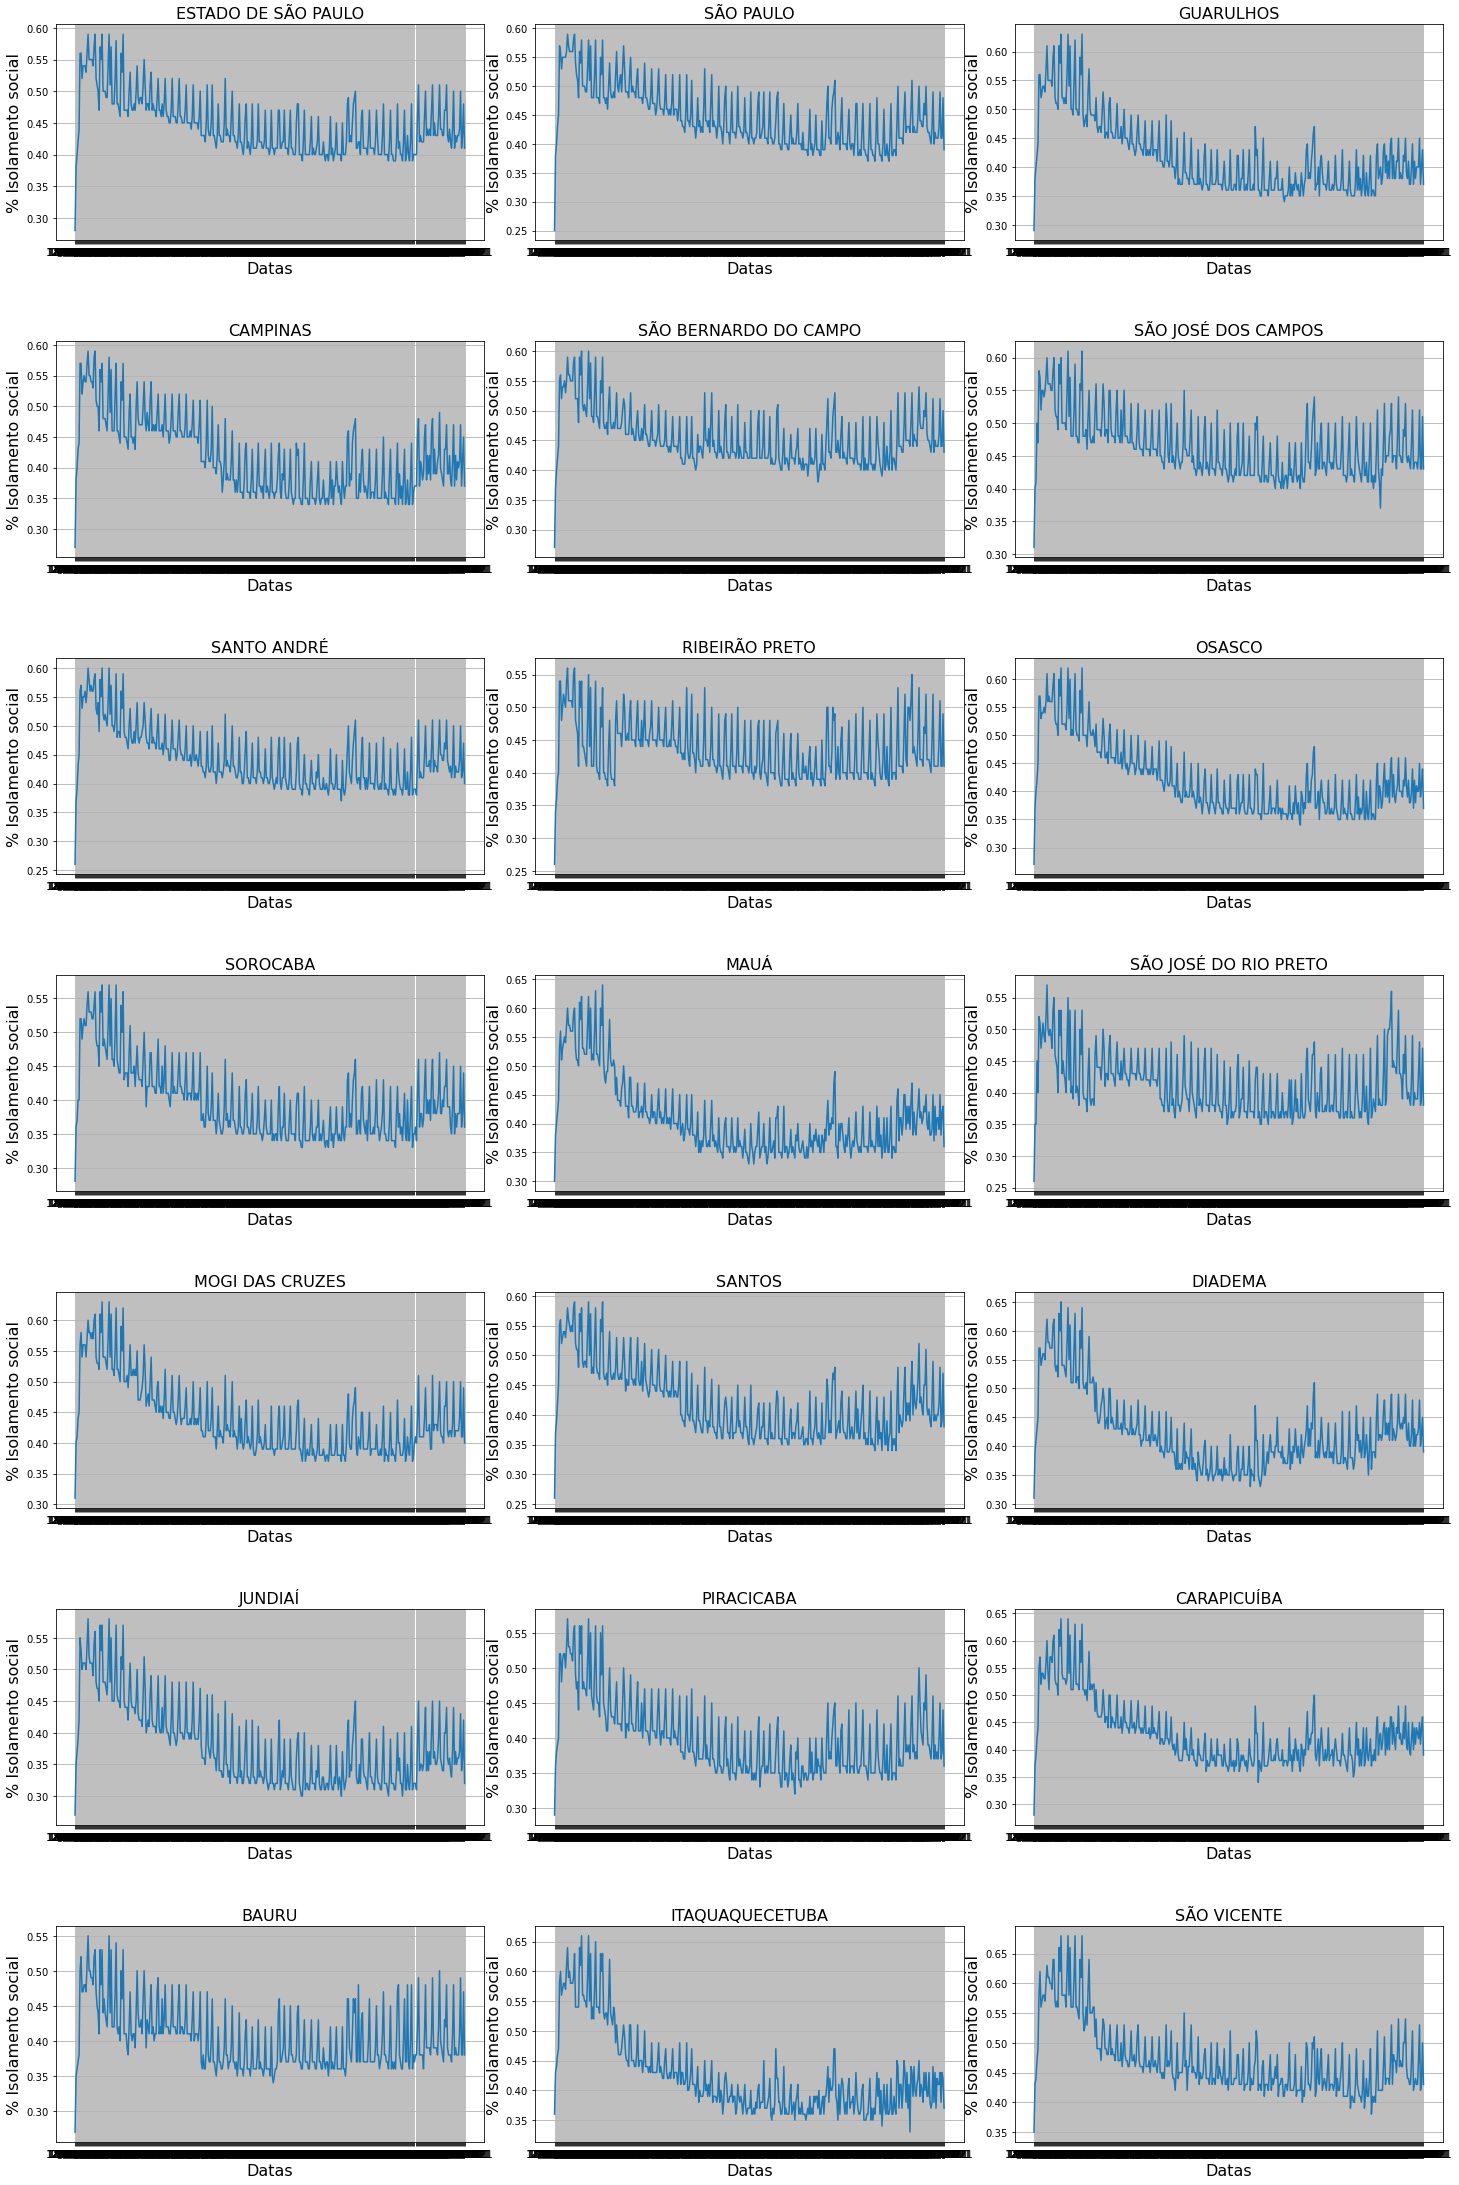

In [76]:
nrows = 7
ncols = 3
x = dfFiltradoSortedTranposed.index.values #1-d array of date type 
MatrizDeCidades = dfFiltradoSortedTranposed.columns.values.reshape(nrows,ncols) #2-d array with city names
i = 0
j = 0        
fig, ax = plt.subplots(nrows, ncols, figsize=(20,30)) #ax is a (nrows, ncols) array of axes
fig.tight_layout(w_pad=2, h_pad=8)
for i in range(nrows):
    for j in range(ncols):
        y = dfFiltradoSortedTranposed[MatrizDeCidades[i][j]]
        ax[i][j].set_title(MatrizDeCidades[i][j], fontsize=16)
        ax[i][j].set_ylabel("% Isolamento social", fontsize=16)
        ax[i][j].set_xlabel("Datas", fontsize=16)
        ax[i][j].grid(visible=bool)
        ax[i][j].plot(x, y)

In [30]:
MatrizDeCidades[5][2]

'CARAPICUÍBA'

In [31]:
dfFiltradoSortedTranposed[MatrizDeCidades[5][2]]

12/03/2020    0.28
17/03/2020    0.37
18/03/2020    0.39
19/03/2020    0.42
20/03/2020    0.44
              ... 
18/04/2021    0.45
19/04/2021    0.41
20/04/2021    0.44
21/04/2021    0.46
22/04/2021    0.39
Name: CARAPICUÍBA, Length: 390, dtype: float64

In [32]:
x = dfFiltradoSortedTranposed.index.values

In [38]:
tup = (1, 2, 3, 4, 5)

In [42]:
tup[4]

5

In [67]:
ax[5][2]

<AxesSubplot:title={'center':'CARAPICUÍBA'}, xlabel='Datas', ylabel='% Isolamento social'>